<ipython-input-2-e95ff6ca5196>:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
<ipython-input-2-e95ff6ca5196>:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
<ipython-input-2-e95ff6ca5196>:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,


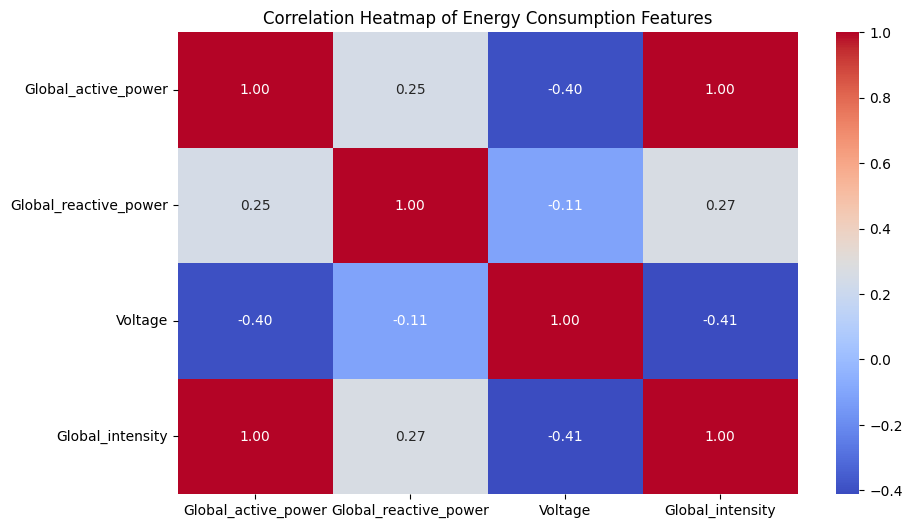

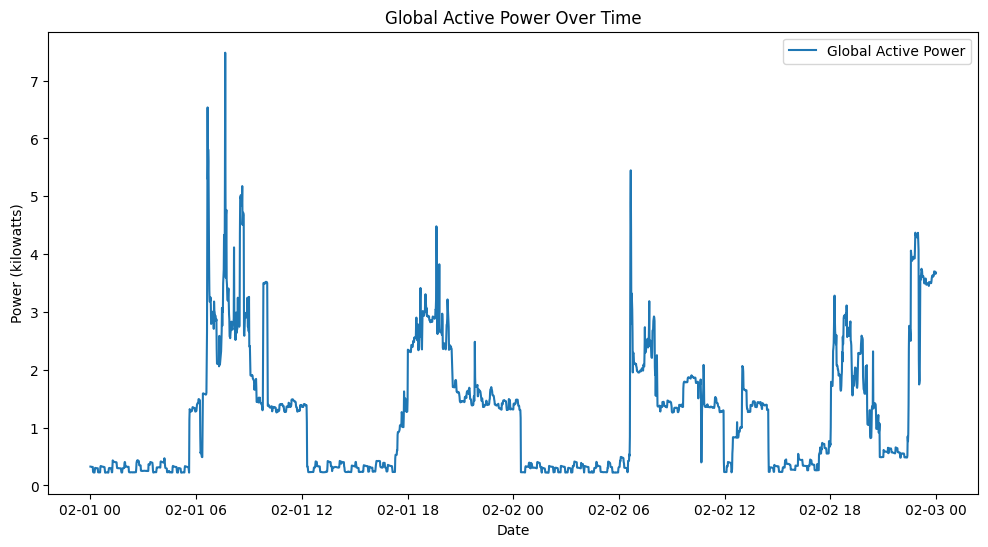

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency min will be used.
  self._init_dates(dates, freq)
<ipython-input-2-e95ff6ca5196>:47: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H'),


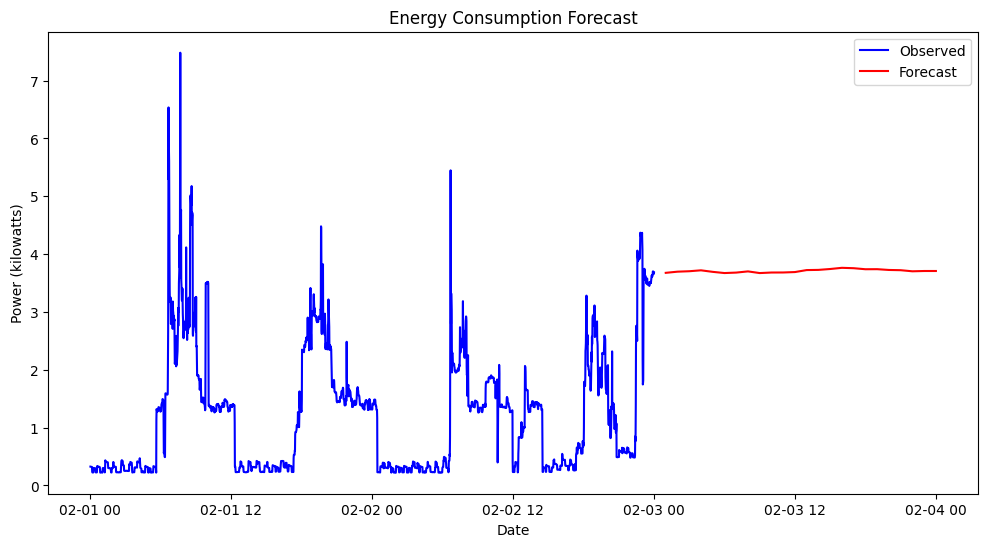

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False,
                 parse_dates={'DateTime': ['Date', 'Time']},
                 na_values='?', infer_datetime_format=True)

# Step 2: Data cleaning
df.dropna(inplace=True)  # Drop rows with NaN values
df['Global_active_power'] = df['Global_active_power'].astype(float)  # Convert to float
df.set_index('DateTime', inplace=True)

# Step 3: Plotting the correlation heatmap
# Selecting a few features for correlation analysis
features = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
plt.figure(figsize=(10, 6))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Energy Consumption Features')
plt.show()

# Step 4: Select a single day's data for simplicity
df = df['2007-02-01':'2007-02-02']

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power')
plt.title('Global Active Power Over Time')
plt.xlabel('Date')
plt.ylabel('Power (kilowatts)')
plt.legend()
plt.show()

# Step 6: Train a simple Exponential Smoothing model
model = ExponentialSmoothing(df['Global_active_power'], trend='add', seasonal='add', seasonal_periods=24)
model_fit = model.fit()

# Step 7: Forecast for the next day
forecast = model_fit.forecast(24)  # Forecast for the next 24 hours

# Step 8: Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Global_active_power'], label='Observed', color='blue')
plt.plot(pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H'),
         forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Power (kilowatts)')
plt.legend()
plt.show()
